## Applications of Linear Algebra and Portfolio Optimisation to Qualitative Fields

## Introduction

The goal of this exercise is to create a space within which I can define activities and on which I can measure certain notions of risk and return. From this we can perform Monte Carlo simulations to identify optimal combinations of these activities in what we will call a 'portfolio'. This document is broken down into five key sections:
1. Defining and Constructing the Feature Space
2. Defining Elements in the Space
3. A Notion of Risk and Return
4. The Risk-Return Scatter Plot
5. The Challenge of Obtaining Meaningful Data

The general framework laid out in this document explores how techniques in both linear algebra and portfolio optimisation can be applied to inform resource allocation decisions in disciplines outside of quantitative finance, and in the wider sense of life. Whilst portfolio optimisation in the context of financial modelling is well documented and understood, the application of these techniques to other disciplines is less explored. Although, this is not without good reason; the modelling of qualitative data and subjective notions as purely quantitative measures is an inherently challenging problem and something we will discuss further in section five.

However, regardless of the efficacy and practicality of this modelling process, this remains an interesting and though-provoking exercise as to how techniques originally from a quantitative field can be applied to qualitative data. It is for that reason I ask that the following work be viewed as such, a thought experiment, and not as a rigorous proposition. Finally, I remind the reader that just because a model is flawed it does not mean it is useless. Often any model is better than no model, for it allows us to extract something from nothing.

## 1. Defining and Constructing the Feature Space

Our goal in this section is to construct notions of certain relevant **features** of our activities, from which we can represent these activities as linear combinations of. I specifically say 'relevant features' as a philosophical perspective could lead you to argue that the space of activities in general is infinite dimensional. Or in other words, you cannot describe every possible activity with a finite number of features. So, for this reason we restrict ourselves to only considering the features relevant to the motivating problem, these are:
-  $e_{1}$ - **net time cost/rebate**; a large positive value represents the activity rewarding/rebating a large amount of time, whereas a large negative value represents the activity requiring a large amount of time (either directly or in the form of opportunity cost).
- $e_{2}$ - **net monetary cost/gain**; a large positive value represents the activity rewarding a large amount of money, whereas a large negative value represents the activity costing a large amount of money (again, either directly or in the form of opportunity cost).
- $e_{3}$ - **fulfilment**; a large positive values represents a very fulfilling activity, whereas a large negative value represents a very 'empty feeling'/meaningless activity.
- $e_{4}$ - **enjoyment**; a large positive value represents a very enjoyable activity, whereas a large negative value represents a miserable activity.
- $e_{5}$ - **social**; a large positive value represents an activity that encourages and improves social interaction, whereas a large negative value represents an isolating activity.

These features can be thought of as the basis vectors spanning our space of activities, in the subsequent section we will go about constructing this basis mathematically in a way that correlations between features are encoded into our space. Also, note how these definitions have been constructed in such a way that a positive value typically has a positive association and a negative value a negative association, this allows us to more easily (although still a challenging task) define correlations between features.

*Disclaimer:* Section five of this document explores the challenge of collecting/concluding the unbiased and meaningful data required throughout this process, namely:
1. Correlation values (between -1, 1) for each pair of features, $e_{i},e_{j}$.
2. Position vectors for each element.
3. Weights for risk and return metrics to determine perceived relative importance of each feature in our risk-return calculation.

However, prior to that discussion we simply assume we are able to collect such sets of data. With that assumption in place, we are free to go about the modelling process without having to worry (for the time being!) about the meaningfulness of the data we are using.

Now we have defined these five features, let us consider a simplified example on just $B = \begin{Bmatrix} e_{1},e_{2},e_{3} \end{Bmatrix}$. And assume we were able to conclude the following correlation values between features:
-  $<e_{1},e_{2}>$ - time and money are correlated with strength $-0.6 \in [-1,1]$; activities that reward money usually require time and activities that reward time usually do not provide money.
-  $<e_{1},e_{3}>$ - time and fulfilment are correlated with strength $0.1$; activities that reward more time can in some cases be considered more fulfilling, although this correlation is very weak.
-  $<e_{2},e_{3}>$ - money and fulfilment are correlated with strength $-0.2$; activities that provide large amounts of money are often unfulfilling on average, although exceptions do of course exist.

Then, these define the **Gram matrix**, $\Gamma$, in the space<br><br>
$\Gamma = \begin{pmatrix}
<e_{1},e_{1}> & <e_{1},e_{2}> & <e_{1},e_{3}> \\
<e_{2},e_{1}> & <e_{2},e_{2}> & <e_{2},e_{3}> \\
<e_{3},e_{1}> & <e_{3},e_{2}> & <e_{3},e_{3}> \\
\end{pmatrix} = \begin{pmatrix}
1 & -0.6 & 0.1 \\
-0.6 & 1 & -0.2 \\
0.1 & -0.2 & 1 \\
\end{pmatrix}$<br>

<font size = 3> **Remarks** </font>
1. For $\Gamma$ to be a valid Gram matrix it must be PSD, i.e. have positive eigenvalues (in our example it is indeed PSD).
2. Even more strongly, we require $\Gamma$ to be PD, such that we can perform a Cholesky factorisation. This yields **$\Gamma = LL^{T}$**. And after setting **$B = L^{T}$**, our **basis vectors** are precisely the columns of this matrix, $B$. The following illustrates why:<br>
$\Gamma = LL^{T} = (L^{T})^{T}L^{T} = B^{T}B$, which is the definition of the Gram matrix when the columns of $B$ are the basis vectors.

In our case this Cholesky factorisation results in $L = \begin{pmatrix}
1 & 0 & 0 \\
-0.6 & 0.8 & 0 \\
0.1 & -0.175 & 0.9794769
\end{pmatrix}$

And so by setting $B = L^{T}$ we obtain our conceptual non-orthogonal basis in this space, $B = \begin{pmatrix} e_{1},e_{2},e_{3} \end{pmatrix}  = \begin{pmatrix} \begin{pmatrix}  1,0,0 \end{pmatrix} , \begin{pmatrix} -0.6,0.8,0 \end{pmatrix} , \begin{pmatrix} 0.1,-0.175,0.9794769 \end{pmatrix}  \end{pmatrix} ^{T}$

## 2. Defining Elements in the Space

Then say we define an element $U$ = "University" with coordinates in our conceptual non-orthogonal basis of $U_{c} = \begin{pmatrix} -0.5, 0.35, 0.5 \end{pmatrix} =  \begin{pmatrix} U_{e_{1}}, U_{e_{2}}, U_{e_{3}} \end{pmatrix}$. Interpreted as "University requires a large amount of time, in theory will reward me monetarily with greater job prospects (despite current onset of debt), and provides a moderate amount of fulfilment/meaning".

To convert the coordinates of elements in our conceptual basis to their coordinates in the standard Euclidean basis ($\mathbb{R}^{n}$), we apply the following transformation. Where $x_{s}$ (of shape $n \times 1$) is the coordinates in the standard basis, and $x_{c}$ (of shape $n \times 1$) is the coordinates in our conceptual basis.
-  $x_{s} = Bx_{c}$

Thus, for our example element $U$, this results in coordinates in the standard basis of:
-  $U_{s} = \displaystyle \begin{pmatrix}
1 & -0.6 & 0.1 \\
0 & 0.8 & -0.175 \\
0 & 0 & 0.9794769
\end{pmatrix} \begin{pmatrix}
-0.5 \\
0.35 \\
0.5
\end{pmatrix} =
\begin{pmatrix}
-0.6600 \\
0.1925 \\
0.4897
\end{pmatrix}$

Below I have used Python, specifically NumPy, Pandas, and Matplotlib (code hidden) to carry out this process of defining correlation values between features, verifying the resulting Gram matrix is PD, obtaining a basis via Cholesky factorisation and then representing some example elements in both this conceptual basis and in a plot on standard Euclidean $\mathbb{R}^{3}$.

Gram =
 [[ 1.  -0.6  0.1]
 [-0.6  1.  -0.2]
 [ 0.1 -0.2  1. ]] 

Gram is positive definite with eigenvalues: [1.66778709 0.3912514  0.94096151] 

B =
[[ 1.        -0.6        0.1      ]
 [ 0.         0.8       -0.175    ]
 [ 0.         0.         0.9794769]] 

Conceptual, B  time  money  fulfilment
Element                               
University     -0.5   0.35         0.5
Poker          -0.5   0.00         0.2
Leetcode       -0.1   0.25         0.2 

Standard, Rn     0       1         2
Element                             
University   -0.66  0.1925  0.489738
Poker        -0.48 -0.0350  0.195895
Leetcode     -0.23  0.1650  0.195895 



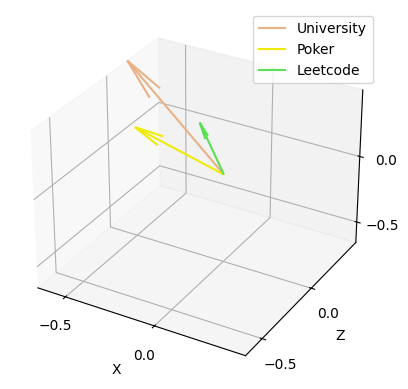

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#PARAMETERS
features = {
    "e1":"time","e2":"money","e3":"fulfilment"
}
correlations = {
    "e1e2":-0.6, "e1e3":0.1, "e2e3":-0.2
}
elements = {
    "University": {features["e1"]:-0.5,features["e2"]:0.35,features["e3"]:0.5},
    "Poker": {features["e1"]:-0.5,features["e2"]:0.0,features["e3"]:0.2},
    "Leetcode": {features["e1"]:-0.1,features["e2"]:0.25,features["e3"]:0.2}
} #in conceptual basis; columns of B.

#GRAM MATRIX
G = np.matrix([[1,correlations["e1e2"],correlations["e1e3"]],
               [correlations["e1e2"],1,correlations["e2e3"]],
               [correlations["e1e3"],correlations["e2e3"],1]])
print(f"Gram =\n {G} \n")

eigs = np.linalg.eigvals(G)
if all(i > 0 for i in eigs):
    print(f"Gram is positive definite with eigenvalues: {eigs} \n")
    B = np.linalg.cholesky(G).T
    print(f"B =\n{B} \n")
elif any(i <= 0 for i in eigs):
    print(f"Gram is not positive definite, eigenvalues: {eigs} \n")

B = np.array(B)
dfc = DataFrame.from_dict(elements, columns = features.values(), orient = "index") #elements in conceptual basis; columns of B.
dfc.index.name = "Element"
dfc.columns.name = "Conceptual, B"
print(f"{dfc} \n")

def rn(row):
    res = np.dot(B,row.values)
    return Series(res)
dfs = dfc.apply(rn,axis = 1) #elements in standard Euclidean Rn.
dfs.columns.name = "Standard, Rn"
print(f"{dfs} \n")


#PLOT
upper = max(0,max(dfs.apply(lambda x:x.max())))
lower = min(0, min(dfs.apply(lambda x:x.min())))
ax = plt.figure().add_subplot(projection = "3d")
ax.set_xlim([lower,upper]), ax.set_ylim([lower,upper]), ax.set_zlim([lower,upper])
ax.set_xlabel("X"), ax.set_ylabel("Z"), ax.set_zlabel("Y"), plt.locator_params(nbins = 4)
#ax.quiver(0,0,0,B[0][0]*10,B[1][0]*10,B[2][0]*10, color = "grey"), ax.quiver(0,0,0,B[0][1]*10,B[1][1]*10,B[2][1]*10, color = "grey"), ax.quiver(0,0,0,B[0][2]*10,B[1][2]*10,B[2][2]*10, color = "grey") #BASIS VECTORS
for row in dfs.itertuples(index = True):
    ax.quiver(0,0,0, row._1,row._2,row._3, label = row.Index, color = (np.random.random(3))) #ELEMENTS
ax.legend(loc = "upper right");

## 3. A Notion of Risk and Return

Now that we have constructed and defined elements on our inner product space, $V \subseteq \mathbb{R}^{n}$ (note that within none of the above steps did we lose generality w.r.t. $n$), we must go about constructing some notion or measure of both risk and return for each element and also a portfolio of elements.

### Elemental Risk & Return

Let $v = \displaystyle \sum_{i = 1}^{n} a_{i}e_{i} \in V$ be an activity, where $e_{i}$ are the features, and $a_{i} \in \mathbb{R}$. Then we denote the **return** of $v$ as $R(v)$ and the **risk** as $\sigma^{2}(v)$ s.t.:

-  $R(v) = \displaystyle \sum_{i = 1}^{n}\max (0,\omega_{Ri}v_{e_{i}}) = \displaystyle \sum_{i = 1}^{n}\max (0,\omega_{Ri}a_{i}), \; \omega_{Ri} \geq 0, \; \sum w_{Ri} = 1$

-  $\sigma^{2}(v) = \displaystyle \sum_{i = 1}^{n}- \min(0,\omega_{\sigma i}v_{e_{i}}) = \displaystyle \sum_{i = 1}^{n}- \min(0,\omega_{\sigma i}a_{i}), \; \omega_{\sigma i} \geq 0, \; \sum w_{\sigma i} = 1$

Where these $\omega$'s can be thought of as the weights determining the 'importance' of each feature in our calculation of risk and return. E.g. say if we perceived time ($e_{1}$) to be of greater importance than money ($e_{2}$) in our calculation of return then we would choose $\begin{Bmatrix} \omega_{R1}, \omega_{R2} \;  | \, \omega_{R1} > \omega_{R2} \end{Bmatrix}$ to reflect this perceived importance relationship.

Also note, by construction $R, \sigma ^{2}$ are both non-negative. This is necessary, particularly $\sigma ^{2} \geq 0$, for later calculations.

### Portfolio Return

Now we have constructed a notion of risk and return for each element, we can think about the more contextually relevant idea of a portfolio or combination of activities.

Let $P = \displaystyle  \sum_{i = 1}^{N} w_{i}v_{i}$ be a **portfolio** of $N\geq 1$ activities, $v_{i} \in V$ (note $P \in V$ too). Again, we impose the restriction $\sum w_{i} = 1$, such that each $w_{i}$ can be thought of as the 'relative weight' of that activity in the portfolio. Then we denote the **return** of $P$ as $R_{P}$ s.t.:

-  $R_{P} = \displaystyle \sum_{i = 1}^{N} w_{i}R(v_{i})$

More colloquially, the return of a portfolio of activities is simply the sum of the return of each activity multiplied by its weight in that portfolio. This is standard.

### Portfolio Risk

Creating a notion of portfolio 'risk' is slightly more challenging due to the correlations between activities. Furthermore, we do not have traditional time series return data for our activities, only a stationary measure of risk, so we cannot calculate covariance and correlation in the usual sense. Instead, we use the inherent properties of the scalar product as a measure of similarity to derive these.

Let us begin by defining the **scalar product** on $V$ as:
-  $< \! v_{Ci}, v_{Cj} \! > \, = v_{Ci}^{T} \, \Gamma \, v_{Cj}, \; v_{Ci},v_{Cj} \in V$ in our conceptual basis, $B$, and where $\Gamma$ is our Gram matrix defined earlier.

This is equivalent to:
-  $< \! v_{Si}, v_{Sj} \! > \, = v_{Si}^{T} \, v_{Sj}, \; v_{Si},v_{Sj} \in V$ in the standard basis, $\mathbb{R}^{n}$.

Then we simply define the **correlation and covariance** between two activities $v_{i}, v_{j}$ to be:
-  $\text{Corr}(v_{i},v_{j}) = \, \displaystyle \frac{< \! v_{i}, v_{j} \! >}{|v_{i}||v_{j}|} $ <br><br>
-  $\text{Cov}(v_{i},v_{j}) = \sqrt{\sigma^{2}(v_{i})}\sqrt{\sigma^{2}(v_{j})} \text{Corr}(v_{i},v_{j}) \; \;$ (recall we constructed $\sigma ^{2}(v)$ s.t. it is non-negative)

Then, from these we define the **risk** of our portfolio, $P$, to be $\sigma^{2}_{P}$ s.t.:

-  $\sigma^{2}_{P} = \displaystyle \sum_{i = 1}^{N}\sum_{j = 1}^{N} w_{i}w_{j}\text{Cov}(v_{i},v_{j}) = W^{T}\text{Cov}W$, where $W$ is the column vector of asset weights $w_{i}$ and $\text{Cov}$ is the covariance matrix given by:

- $\text{Cov} = \begin{pmatrix}
\text{Cov}(v_{1},v_{1}) & \text{Cov}(v_{1},v_{2}) & \cdots & \text{Cov}(v_{1},v_{N})\\
\text{Cov}(v_{2},v_{1}) & \text{Cov}(v_{2},v_{2}) & \cdots & \text{Cov}(v_{2},v_{N})\\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(v_{N},v_{1}) & \text{Cov}(v_{N},v_{2}) & \cdots & \text{Cov}(v_{N},v_{N})
\end{pmatrix}$, where $\text{Cov}(v_{i},v_{j}) = \text{Cov}(v_{j},v_{i})$

### Portfolio Sharpe Ratio

Let $P \in V$ be a portfolio with return $R_{P}$ and risk $\sigma^{2}_{P}$. Then the Sharpe ratio of $P$ is defined as:
-  $\text{Sharpe}(P) = \displaystyle \frac{R_{P}}{\sqrt{\sigma^{2}_{P}}}$

Our end goal is to find the combination of elements that maximises our Sharpe ratio. i.e.
-  $\begin{Bmatrix} \hat{P} \in V \; | \; \text{Sharpe}(\hat{P}) \geq \text{Sharpe}(P_{i}), \; P_{i} \in V \end{Bmatrix}$

<font size = 3> **Remark** </font> - A sensible contextual notion of risk-free return in our space is not immediately obvious; I argue there is no meaningful activity/portfolio of activities completely free of all forms of risk. However, as long as our calculation remains consistent, omitting this risk-free rate from our Sharpe calculation has no effect on the comparability of our results.

## 4. The Risk-Return Scatter Plot

Again, this general framework as described above has been implemented on the next page using NumPy, Pandas, and Matplotlib (code hidden). First, we define correlations between all five of our features before verifying the resulting Gram matrix is positive definite and performing a Cholesky factorisation to obtain our conceptual basis. Then we introduce a collection of example elements before computing our notion of risk and return for each and defining pairwise correlations and covariances. With these structures in place, we can perform Monte-Carlo simulations by generating randomly weighted portfolios and plotting the risk-return of each on a scatter plot. From these plots we can identify the efficient frontier, on which the portfolios producing the greatest return for each given risk level can be found. Furthermore, the 'optimal' portfolio, $\hat{P}$, as described above sits on this efficient frontier and has been marked by a red star.

From this scatter plot we observe a correlation coefficient of $0.419$ for our data, indicating a moderate positive correlation between our notions of portfolio risk and return in this example. We also observe Sharpe ratios in the range $0.388$-$0.767$ which whilst may appear lower than we are used to, due to our alternative notions, are likely incomparable to Sharpe values derived from traditional time-series data.

Gram = 
[[ 1.   -0.6   0.1   0.    0.15]
 [-0.6   1.   -0.2  -0.4  -0.4 ]
 [ 0.1  -0.2   1.   -0.15  0.1 ]
 [ 0.   -0.4  -0.15  1.    0.2 ]
 [ 0.15 -0.4   0.1   0.2   1.  ]] 

Gram is positive definite with eigenvalues: [1.97035467 0.2341217  1.17974479 0.89654919 0.71922965] 

Conceptual, B    time  money  fulfilment  enjoyment  social
Element                                                    
University       -0.5   0.35         0.5      -0.50     0.4
Poker            -0.5   0.00         0.2       0.60     0.4
Leetcode         -0.1   0.25         0.2      -0.50    -0.5
LSMF             -0.3   0.25         0.1      -0.35     0.2
Equity Research  -0.2   0.40         0.2       0.20     0.1
Intern. Appl.    -0.2   0.20         0.2      -0.10     0.2 

                 Return   Risk
Element                       
University       0.2275  0.175
Poker            0.1400  0.125
Leetcode         0.1025  0.125
LSMF             0.1025  0.110
Equity Research  0.1700  0.050
Intern. Appl.    0.110

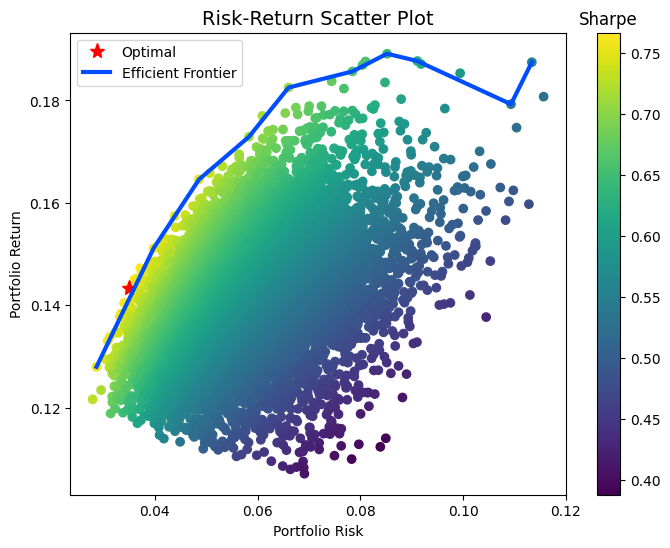

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from matplotlib import ticker
pd.options.display.max_columns = None
pd.set_option('display.width', 1000)
rng = np.random.default_rng()

#PARAMETERS
features = {
    "e1":"time","e2":"money","e3":"fulfilment","e4":"enjoyment","e5":"social"
}
correlations = {
    "e1e2":-0.6, "e1e3":0.1, "e1e4":0, "e1e5":0.15,
                 "e2e3":-0.2, "e2e4":-0.4, "e2e5":-0.4,
                             "e3e4":-0.15, "e3e5":0.1,
                                           "e4e5":0.2
}
elements = {
    "University":{features["e1"]:-0.5,features["e2"]:0.35,features["e3"]:0.5,features["e4"]:-0.5,features["e5"]:0.4},
    "Poker":{features["e1"]:-0.5,features["e2"]:0.0,features["e3"]:0.2,features["e4"]:0.6,features["e5"]:0.4},
    "Leetcode":{features["e1"]:-0.1,features["e2"]:0.25,features["e3"]:0.2,features["e4"]:-0.5,features["e5"]:-0.5},
    "LSMF":{features["e1"]:-0.3,features["e2"]:0.25,features["e3"]:0.1,features["e4"]:-0.35,features["e5"]:0.2},
    "Equity Research":{features["e1"]:-0.2,features["e2"]:0.4,features["e3"]:0.2,features["e4"]:0.2,features["e5"]:0.1},
    "Intern. Appl.":{features["e1"]:-0.2,features["e2"]:0.2,features["e3"]:0.2,features["e4"]:-0.1,features["e5"]:0.2} #note this is applying and not strictly the internship itself
}
returnWeights = {
    features["e1"]:0.35, features["e2"]:0.25, features["e3"]:0.2, features["e4"]:0.1, features["e5"]:0.1
} #perceived importance of each feature in our return calculation

riskWeights = {
    features["e1"]:0.25, features["e2"]:0.3, features["e3"]:0.25, features["e4"]:0.1, features["e5"]:0.1
} #perceived importance of each feature in our risk calculation


#CONSTRUCTING THE SPACE
G = np.matrix([[1, correlations["e1e2"], correlations["e1e3"], correlations["e1e4"], correlations["e1e5"]],
               [correlations["e1e2"],1,correlations["e2e3"],correlations["e2e4"],correlations["e2e5"]],
               [correlations["e1e3"],correlations["e2e3"],1,correlations["e3e4"],correlations["e3e5"]],
               [correlations["e1e4"],correlations["e2e4"],correlations["e3e4"],1,correlations["e4e5"]],
               [correlations["e1e5"],correlations["e2e5"],correlations["e3e5"],correlations["e4e5"],1]
               ])
print(f"Gram = \n{G} \n")

eigs = np.linalg.eigvals(G)
if all(i > 0 for i in eigs):
    print(f"Gram is positive definite with eigenvalues: {eigs} \n")
    B = np.linalg.cholesky(G).T
    #print(f"B = {B} \n---\n")
elif any(i <= 0 for i in eigs):
    print(f"Gram is not positive definite, eigenvalues: {eigs} \n")

B = np.array(B)
dfc = DataFrame.from_dict(elements, columns = features.values(), orient = "index") #elements in conceptual basis; columns of B.
dfc.index.name = "Element"
dfc.columns.name = "Conceptual, B"
print(f"{dfc} \n")

def rn(row):
    res = np.dot(B,row.values)
    return Series(res)
dfs = dfc.apply(rn,axis = 1) #elements in standard Euclidean, Rn.
dfs.columns.name = "Standard, Rn"
#print(f"{dfs} \n---\n")

#RISK & RETURN
rr = DataFrame({
    "Return":(dfc.map(lambda x: max(x,0))*returnWeights).sum(axis = 1),
    "Risk":(dfc.map(lambda x: min(x,0))*-1*riskWeights).sum(axis = 1)})
print(f"{rr} \n")

corr = np.zeros((len(elements),len(elements)))
cov =  np.zeros((len(elements),len(elements)))
for i,vi in enumerate(dfs.index):
    for j,vj in enumerate(dfs.iloc[i:,:].index):
        corr[i,j+i] = np.dot(np.array(dfs.loc[vi,:]),dfs.loc[vj,:])/(np.linalg.norm(dfs.loc[vi,:])*np.linalg.norm(dfs.loc[vj,:]))
        cov[i,j+i] = np.sqrt(rr.loc[vi,"Risk"])*np.sqrt(rr.loc[vj,"Risk"])*corr[i,j+i]
corr, cov = corr + corr.T - np.diag(np.diag(corr)), cov + cov.T - np.diag(np.diag(cov))
print(f"Correlations\n{DataFrame(corr.round(3), index = elements.keys(), columns = elements.keys())} \n")
#print(f"Covariance\n{DataFrame(cov, index = elements.keys(), columns = elements.keys())} \n")

noPorts = 10000 #number of portfolios to simulate

rand = rng.random(size = (len(elements), noPorts))
portWeights = rand/rand.sum(axis = 0) #portWeights.sum() = 1; each column is a set of weights
ports = DataFrame({"Portfolio Return":np.dot(rr["Return"],portWeights),
                   "Portfolio Risk":np.diag(portWeights.T @ cov @ portWeights)},
                  index = [tuple(x) for x in portWeights.T.round(3)])
ports["Sharpe"] = ports["Portfolio Return"]/np.sqrt(ports["Portfolio Risk"])
ports.sort_values("Sharpe", ascending = False, inplace = True)
ports.index.name = "Weights"
with pd.option_context("display.max_rows", 8):
    print(ports.round(3))
print(f"\nRisk-Return correlation coefficient: {ports.loc[:,:"Portfolio Risk"].corr().iloc[0,1].round(3)}")

bins = np.arange(np.floor(ports["Portfolio Risk"].min()*100)/100, np.ceil(ports["Portfolio Risk"].max()*100)/100 + 0.01, 0.01)
ports["Risk bins"] = pd.cut(ports["Portfolio Risk"],bins)
frontier = ports.loc[ports.groupby("Risk bins", observed = True)["Portfolio Return"].idxmax(),"Portfolio Return":"Portfolio Risk"]

#PLOT
fig, ax = plt.subplots()
fig.set_figheight(6), fig.set_figwidth(8)
plot1 = ax.scatter(ports["Portfolio Risk"], ports["Portfolio Return"], c = ports["Sharpe"])
optimal, = ax.plot(ports.iloc[:1,1], ports.iloc[:1,0], marker = "*", color = "#ff0000", markersize = 11, label = "Optimal")
effFrontier, = ax.plot(frontier["Portfolio Risk"], frontier["Portfolio Return"], color = "#004cff", linewidth = 3, label = "Efficient Frontier")
ax.legend(handles = [optimal,effFrontier], loc = "best").legend_handles[0].set_linestyle("None")
ax.set_title("Risk-Return Scatter Plot", fontdict = {"fontsize":14})
ax.set_xlabel("Portfolio Risk"), ax.set_ylabel("Portfolio Return")
clb = fig.colorbar(plot1)
clb.ax.set_title("Sharpe");

## 5. The Challenge of Obtaining Meaningful Data

As stated in our disclaimer near the start of this document, to construct the space and also draw conclusions about the relative risks and returns of elements and thus portfolios within it, we must obtain three critical sets of data:
1. Correlation values (between -1, 1) for each pair of features, $e_{i},e_{j} \in B$.
2. Position vectors for each element in our conceptual basis, $B$.
3. Weights for risk and return metrics, $\omega$, to determine perceived relative importance of each feature in our calculation.

Converting such qualitative data and subjective notions into quantitative measures we can draw meaningful conclusions from is obviously not trivial and the most inherently flawed part of this modelling process. And whilst the values used in the above example were chosen in a discretionary manner, using this approach for anything more than illustrative purposes is likely to cause dispute between individuals who hold different qualitative and philosophical beliefs. Therefore, naturally the most sensible and fair way of collecting such data would be to ask a suitably large and relevant sample of the public.

This of course is not without its own problems and challenges. It would require widely agreed on definitions of each feature, activity and notion, and questions constructed in a way that are unambiguous as to what they are asking. Even if it were possible to construct such questions, the concepts required to frame those questions would be inherently complex and difficult to comprehend, for example what it means exactly for an activity to "reward you with time" is not something most people have ever had to associate a quantitative answer with.

So whilst a concrete set of questions allowing us to collect this necessary data in a fair and unbiased manner is beyond the scope of this document (and my abilities), the above does briefly introduce and explore some of the challenges and considerations to be made when attempting to do so.

## Conclusion

In this document we have explored how techniques from linear algebra, finance, and statistics can be applied to construct quantitative notions of risk and return on qualitative data, and how this can be used to make informed decisions regarding resource allocation in non-quantitative fields.

We defined the five fundamental features describing our space along with their pairwise correlations, before verifying positive definiteness of the Gram matrix and constructing, with the help of Cholesky factorisation, a basis with these correlations encoded in. We then went about defining some notion of both risk and return for activities within our space as a weighted sum of their negative or positive coordinates in our basis. We ensured this made sense conceptually by defining our features in such a way that increasingly positive (or negative) values were associated with increasingly positive (or negative) characteristics, and vice versa. We then extended these notions to the more relevant idea of a portfolio of activities by introducing the scalar product, correlation, and covariance. This is crucial to properly capturing the effects activities have on one another's risk and return and on the portfolio itself. We then made this actionable by carrying out Monte-Carlo simulations to map the efficient frontier and optimal portfolio, and to observe the empirical correlations between portfolio risk and return. To conclude, we briefly discussed the inherent flaws of the modelling process and the challenges that arise from trying to collect unbiased and meaningful data.

Throughout this document our examples have considered only one field described by one set of features and risk-return metrics defined by only one set of weights. Depending on the field being studied, its important characteristics, the activities within that field, and more; your set of features, their correlations, your risk-return weights, and all other parameters will vary. What I'm trying to say is that although I cannot cover all the possible use cases, this document outlines a framework for a model that given a set of parameters and elements can produce quantitative outputs that allow us to draw conclusions not immediately obvious from the qualitative data alone.

*Where code blocks have been redacted in this document, they are available at https://github.com/Ollie07952.*